<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/computer_vision/Single_Object_Detection_Classification_and_Bounding_Box_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References,

https://github.com/SIlvaMFPedro/pyimagesearch/tree/master/bounding-box-regression

https://github.com/SIlvaMFPedro/pyimagesearch/tree/master/multi-class-bbox-regression

TODO: 
- Add multi class classification and regression
- Try to add multi label classification

# Mount colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy and unzip data

In [ ]:
!cp -r "/content/drive/MyDrive/ML zantrik/Object_Detection_Research/bounding-box-regression/bounding-box-regression.zip" "/content/"

In [ ]:
!cp -r "/content/drive/MyDrive/ML zantrik/Object_Detection_Research/multi-class-bbox-regression/multi-class-bbox-regression.zip" "/content/"

In [ ]:
!unzip bounding-box-regression.zip

Archive:  bounding-box-regression.zip
   creating: bounding-box-regression/
   creating: bounding-box-regression/dataset/
   creating: bounding-box-regression/dataset/images/
 extracting: bounding-box-regression/dataset/images/image_0006.jpg  
 extracting: bounding-box-regression/dataset/images/image_0273.jpg  
 extracting: bounding-box-regression/dataset/images/image_0469.jpg  
 extracting: bounding-box-regression/dataset/images/image_0048.jpg  
 extracting: bounding-box-regression/dataset/images/image_0059.jpg  
 extracting: bounding-box-regression/dataset/images/image_0074.jpg  
 extracting: bounding-box-regression/dataset/images/image_0109.jpg  
 extracting: bounding-box-regression/dataset/images/image_0116.jpg  
 extracting: bounding-box-regression/dataset/images/image_0138.jpg  
 extracting: bounding-box-regression/dataset/images/image_0162.jpg  
 extracting: bounding-box-regression/dataset/images/image_0216.jpg  
 extracting: bounding-box-regression/dataset/images/image_0242.jpg

In [ ]:
!unzip multi-class-bbox-regression.zip

Archive:  multi-class-bbox-regression.zip
   creating: multi-class-bbox-regression/
   creating: multi-class-bbox-regression/dataset/
   creating: multi-class-bbox-regression/dataset/images/
   creating: multi-class-bbox-regression/dataset/images/motorcycle/
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0548.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0656.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0382.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0432.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0491.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0492.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0498.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/image_0503.jpg  
 extracting: multi-class-bbox-regression/dataset/images/motorcycle/im

# Fix not downloaded csv file

**Use this incase the downloaded csv file is not correct.**

In [ ]:
!rm "/content/bounding-box-regression/dataset/airplanes.csv"

In [ ]:
!cp "/content/drive/MyDrive/ML zantrik/Object_Detection_Research/bounding-box-regression/airplanes.csv" "/content/bounding-box-regression/dataset/"

# Get test data

In [ ]:
!cp -r '/content/drive/MyDrive/ML zantrik/Object_Detection_Research/bounding-box-regression/test' '/content/bounding-box-regression/dataset'

# Read label file

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bounding-box-regression/dataset/airplanes.csv', header=None)

In [ ]:
df.head(20)

,0,1,2,3,4
0,image_0001.jpg,49,30,349,137
1,image_0002.jpg,59,35,342,153
2,image_0003.jpg,47,36,331,135
3,image_0004.jpg,47,24,342,141
4,image_0005.jpg,48,18,339,146
5,image_0006.jpg,48,24,344,126
6,image_0007.jpg,49,23,344,122
7,image_0008.jpg,51,29,344,119
8,image_0009.jpg,50,29,344,137
9,image_0010.jpg,55,32,335,106


In [ ]:
print(df.iloc[0])

0    image_0001.jpg
1                49
2                30
3               349
4               137
Name: 0, dtype: object


In [ ]:
print(df.iloc[0][0])

image_0001.jpg


# Show an image

In [ ]:
test_file_index = 20
test_file = '/content/bounding-box-regression/dataset/images/' + df.iloc[test_file_index][0]

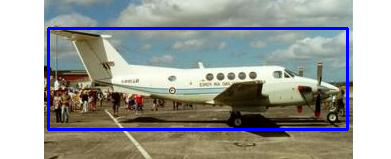

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

im = cv2.imread(test_file)

im = cv2.rectangle(im, (df.iloc[test_file_index][1], df.iloc[test_file_index][2]),	(df.iloc[test_file_index][3], df.iloc[test_file_index][4]), (255, 0, 0), 2)

cv2_imshow(im)

# Train

## Setup paths

In [ ]:
# -----------------------------
#   IMPORTS
# -----------------------------
# Import the necessary packages
import os

# Define the base path to the input dataset and then use it to derive the path to the images directory
# and  the annotation CSV file
BASE_PATH = "/content/bounding-box-regression/dataset"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "images"])
ANNOTATIONS_PATH = os.path.sep.join([BASE_PATH, "airplanes.csv"])

# Define the path to the base output directory
BASE_OUTPUT = "/content/bounding-box-regression/output"

# Define the path to the output serialized model, model training plot, and the testing image filenames
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])

# Initialize our initial learning rate, number of epochs to train for, and the batch size
INIT_LR = 1e-4
NUM_EPOCHS = 25
BATCH_SIZE = 32

## Import statements

In [ ]:
# -----------------------------
#   USAGE
# -----------------------------
# python train.py

# -----------------------------
#   IMPORTS
# -----------------------------
# Import the necessary packages
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Read annotations csv to get labels and file name

In [ ]:
# Load the contents of the CVS annotations file
print("[INFO] Loading dataset...")
rows = open(ANNOTATIONS_PATH).read().strip().split("\n")

print(rows)

[INFO] Loading dataset...
['image_0001.jpg,49,30,349,137', 'image_0002.jpg,59,35,342,153', 'image_0003.jpg,47,36,331,135', 'image_0004.jpg,47,24,342,141', 'image_0005.jpg,48,18,339,146', 'image_0006.jpg,48,24,344,126', 'image_0007.jpg,49,23,344,122', 'image_0008.jpg,51,29,344,119', 'image_0009.jpg,50,29,344,137', 'image_0010.jpg,55,32,335,106', 'image_0011.jpg,58,35,344,130', 'image_0012.jpg,49,25,344,122', 'image_0013.jpg,48,31,344,146', 'image_0014.jpg,55,37,349,121', 'image_0015.jpg,61,39,353,163', 'image_0016.jpg,59,54,327,137', 'image_0017.jpg,62,37,347,143', 'image_0018.jpg,57,33,348,147', 'image_0019.jpg,51,33,341,146', 'image_0020.jpg,45,31,345,165', 'image_0021.jpg,48,28,347,129', 'image_0022.jpg,49,30,344,130', 'image_0023.jpg,50,23,341,121', 'image_0024.jpg,48,25,344,106', 'image_0025.jpg,56,31,342,140', 'image_0026.jpg,59,30,337,127', 'image_0027.jpg,53,25,348,123', 'image_0028.jpg,54,29,346,114', 'image_0029.jpg,56,29,348,119', 'image_0030.jpg,47,15,354,161', 'image_0031.j

# Load filenames, images and resize images for model, rescale labels. 

In [ ]:
# Initialize the list of data (images), the target output predictions (bounding box coordinates),
# along with the filenames of the individual images
data = []
targets = []
filenames = []

# Loop over the rows
for row in rows:
    
    # Break the row into the filename and bounding box coordinates
    row = row.split(",")
    (filename, startX, startY, endX, endY) = row
    
    # Derive the path to the input image, load the image (in OpenCV format), and grab its dimensions
    imagePath = os.path.sep.join([IMAGES_PATH, filename])
    image = cv2.imread(imagePath)
    (h, w) = image.shape[:2]

    # Scale the bounding box coordinates relative to the spatial dimensions of the input image
    startX = float(startX) / w
    startY = float(startY) / h
    endX = float(endX) / w
    endY = float(endY) / h

    # Load the image and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    
    # Update the list of data, targets and filenames
    data.append(image)
    targets.append((startX, startY, endX, endY))
    filenames.append(filename)



# Normalize, convert to float32 and do train,test split

In [ ]:
# Convert the data and targets to NumPy arrays, scaling the input pixel intensities, from the range [0, 255] to [0, 1]
data = np.array(data, dtype="float32") / 255.0
targets = np.array(targets, dtype="float32")

# Partition the data into training and testing splits using 90% of the data for training and 10% of the data for testing
split = train_test_split(data, targets, filenames, test_size=0.10, random_state=42)

print("TOTAL SPLIT:")
print(len(split))

print("\nTRAIN LABELS:")
print(split[2])
print(split[2].shape)
print("\nTEST LABELS:")
print(split[3])
print(split[3].shape)

print("\nTRAIN IMAGE NAMES:")
print(split[4])
print(len(split[4]))
print("\nTEST IMAGE NAMES:")
print(split[5])
print(len(split[5]))

TOTAL SPLIT:
6

TRAIN LABELS:
[[0.13868614 0.2184874  0.86618006 0.8067227 ]
 [0.10687023 0.21186441 0.8778626  0.80508476]
 [0.12244898 0.21582733 0.752551   0.79856116]
 ...
 [0.14492753 0.21290323 0.8285024  0.7935484 ]
 [0.1281407  0.21259843 0.8743719  0.81889766]
 [0.1164557  0.21052632 0.87848103 0.81954885]]
(720, 4)

TEST LABELS:
[[0.14       0.21232876 0.88       0.79452056]
 [0.13316584 0.20134228 0.8718593  0.81208056]
 [0.11734694 0.22023809 0.872449   0.8333333 ]
 [0.11989796 0.19008264 0.88265306 0.8264463 ]
 [0.11195929 0.1388889  0.8727735  0.8333333 ]
 [0.1610577  0.36363637 0.84615386 0.7151515 ]
 [0.13691932 0.19298245 0.8630807  0.80701756]
 [0.14786968 0.19393939 0.8671679  0.8       ]
 [0.11970074 0.203125   0.8703242  0.796875  ]
 [0.1037037  0.16541353 0.8691358  0.80451125]
 [0.13065326 0.26530612 0.8643216  0.7414966 ]
 [0.14215687 0.24183007 0.8382353  0.8039216 ]
 [0.13164558 0.21551724 0.8759494  0.80172414]
 [0.125      0.1734104  0.8647959  0.8323699 ]
 

## Load train, test split data

In [ ]:
# Unpack the data split
(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]
(trainFilenames, testFilenames) = split[4:]

# Write the testing filenames to disk in order to use them when evaluating/testing the bounding box regression model
print("[INFO] Saving testing filenames...")
f = open(TEST_FILENAMES, "w")
f.write("\n".join(testFilenames))
f.close()

[INFO] Saving testing filenames...


## Create model

In [ ]:
# Load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze all VGG layers so they will *not* be updated during the training process
vgg.trainable = False

# Flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# Construct a fully-connected layer header to output the predicted bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)

# Construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

58892288/58889256 [==============================] - 0s 0us/step


## Model compile

In [ ]:
# Initialize the optimizer, compile the model, and show the model summary
opt = Adam(lr=INIT_LR)
model.compile(loss="mse", optimizer=opt)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Show model graph

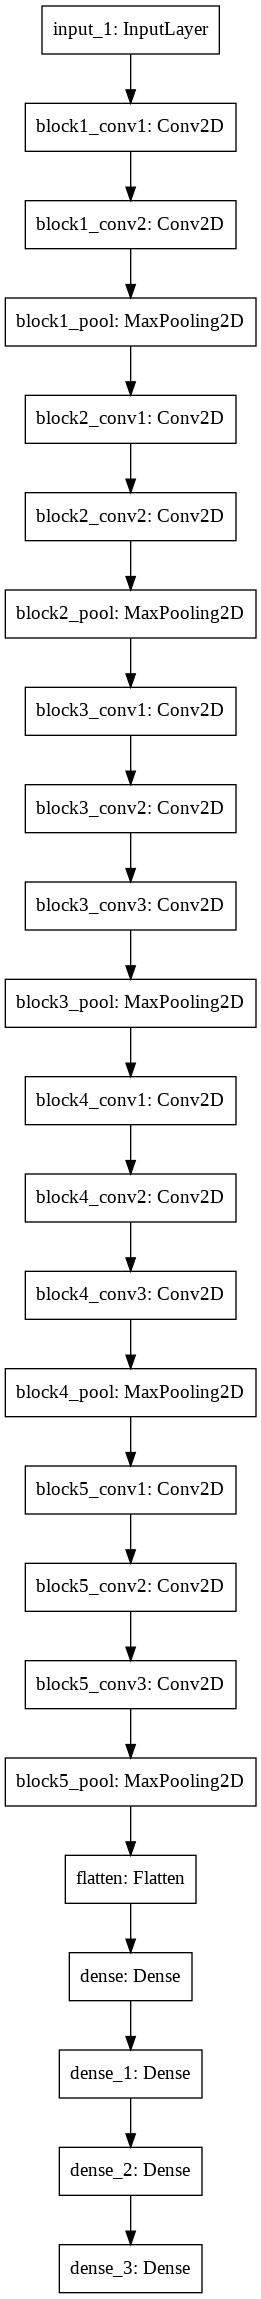

In [ ]:
from tensorflow import keras
keras.utils.plot_model(model, "bbox_regression_model.png")

## Train model

In [ ]:
# Train the network for bounding box regression
print("[INFO] Training the bounding box regression model...")
H = model.fit(trainImages, trainTargets, validation_data=(testImages, testTargets),
              batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1)

[INFO] Training the bounding box regression model...
Epoch 1/25
23/23 [==============================] - 45s 284ms/step - loss: 0.0281 - val_loss: 0.0012
Epoch 2/25
23/23 [==============================] - 3s 130ms/step - loss: 0.0015 - val_loss: 6.0084e-04
Epoch 3/25
23/23 [==============================] - 3s 130ms/step - loss: 6.8463e-04 - val_loss: 5.4524e-04
Epoch 4/25
23/23 [==============================] - 3s 130ms/step - loss: 8.0068e-04 - val_loss: 4.9056e-04
Epoch 5/25
23/23 [==============================] - 3s 129ms/step - loss: 6.6109e-04 - val_loss: 5.0260e-04
Epoch 6/25
23/23 [==============================] - 3s 130ms/step - loss: 5.5589e-04 - val_loss: 4.6438e-04
Epoch 7/25
23/23 [==============================] - 3s 131ms/step - loss: 4.4551e-04 - val_loss: 4.5257e-04
Epoch 8/25
23/23 [==============================] - 3s 131ms/step - loss: 3.2401e-04 - val_loss: 4.5556e-04
Epoch 9/25
23/23 [==============================] - 3s 131ms/step - loss: 3.1678e-04 - val_los

## Save model

In [ ]:
# Serialize the model to disk
print("[INFO] Saving object detector model...")
model.save(MODEL_PATH, save_format="h5")

[INFO] Saving object detector model...


## Plot loss graph

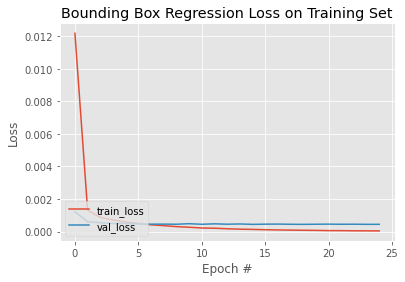

In [ ]:
# Plot the model training history
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(PLOT_PATH)

# Predict

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os

In [ ]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg' -O '/content/bounding-box-regression/dataset/test/cat.jpg'

--2021-04-01 13:21:39--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2833605 (2.7M) [image/jpeg]
Saving to: ‘/content/bounding-box-regression/dataset/test/cat.jpg’

/content/bounding-b 100%[===================>]   2.70M  15.4MB/s    in 0.2s    

2021-04-01 13:21:39 (15.4 MB/s) - ‘/content/bounding-box-regression/dataset/test/cat.jpg’ saved [2833605/2833605]



In [ ]:
import glob
file_list = glob.glob('/content/bounding-box-regression/dataset/test/*.jpg')
print(file_list)

['/content/bounding-box-regression/dataset/test/cat.jpg', '/content/bounding-box-regression/dataset/test/48764060802_f4d4f052a2_o.jpg', '/content/bounding-box-regression/dataset/test/GettyImages-1131335393-e1580493890249-scaled.jpg', '/content/bounding-box-regression/dataset/test/essay-on-aeroplane.jpg', '/content/bounding-box-regression/dataset/test/depositphotos_9213059-stock-photo-airplane.jpg', '/content/bounding-box-regression/dataset/test/photo-1529074963764-98f45c47344b.jpg']


(439, 960, 3)


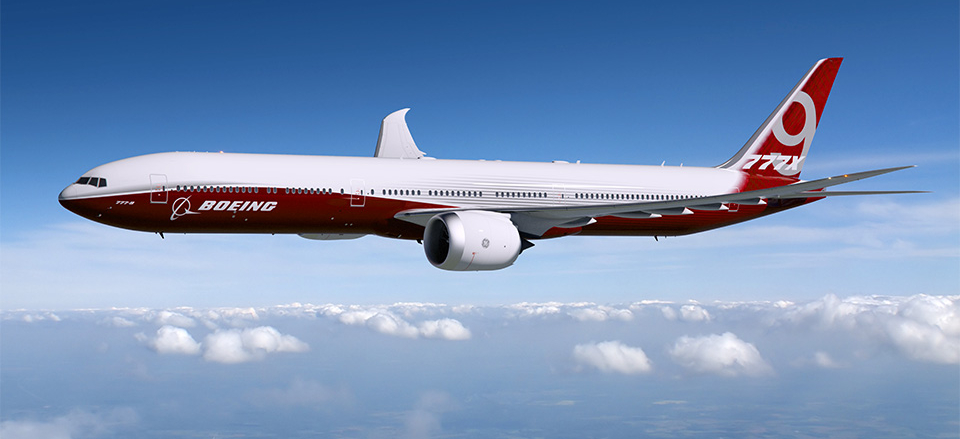

(274, 600, 3)


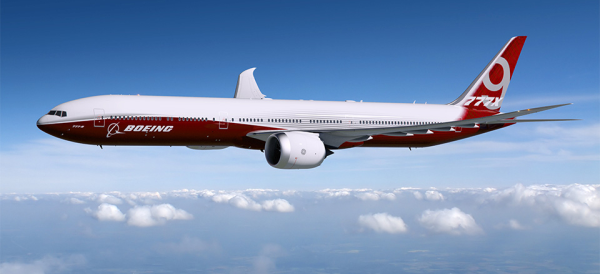

In [ ]:
image = cv2.imread(file_list[1])
print(image.shape)
cv2_imshow(image)

image = imutils.resize(image, width=600)
print(image.shape)
cv2_imshow(image)

(224, 224, 3)
(1, 224, 224, 3)
[[0.2609046  0.11031791 0.78498894 0.8045257 ]]
(2397, 1795, 3)
(801, 600, 3)


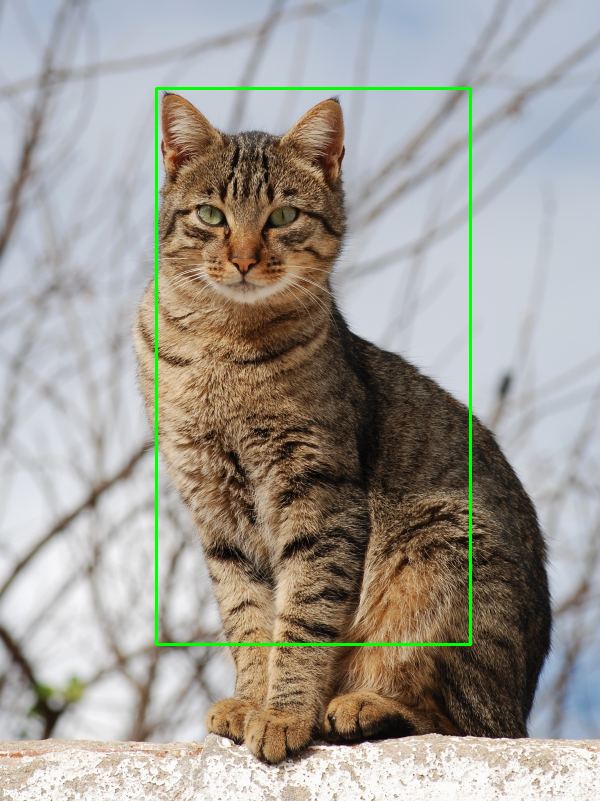

(224, 224, 3)
(1, 224, 224, 3)
[[0.20706588 0.21589684 0.8487658  0.7347691 ]]
(439, 960, 3)
(274, 600, 3)


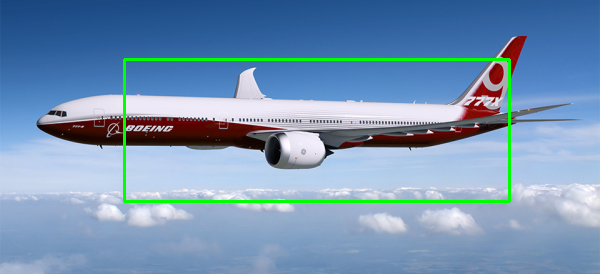

(224, 224, 3)
(1, 224, 224, 3)
[[0.22515164 0.29022044 0.82489806 0.7478004 ]]
(1709, 2560, 3)
(400, 600, 3)


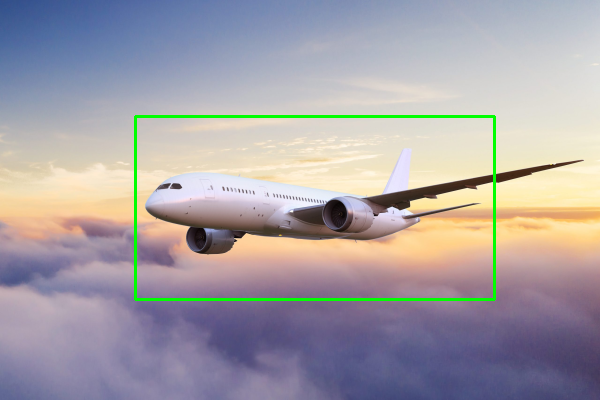

(224, 224, 3)
(1, 224, 224, 3)
[[0.11013148 0.25888303 0.85204065 0.81685627]]
(281, 500, 3)
(337, 600, 3)


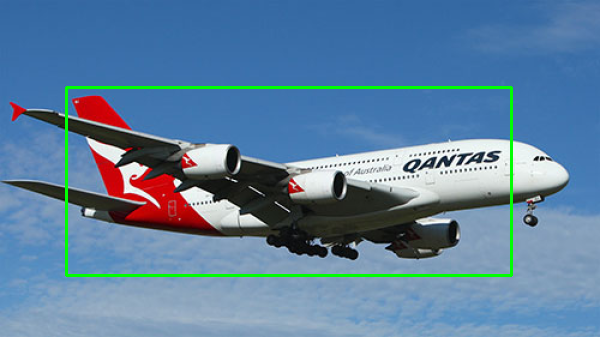

(224, 224, 3)
(1, 224, 224, 3)
[[0.11851128 0.27929497 0.87168825 0.73364264]]
(348, 600, 3)
(348, 600, 3)


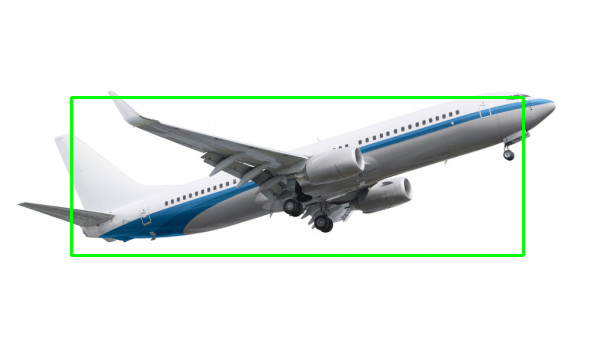

(224, 224, 3)
(1, 224, 224, 3)
[[0.22458327 0.30280468 0.8286956  0.7442769 ]]
(655, 1000, 3)
(393, 600, 3)


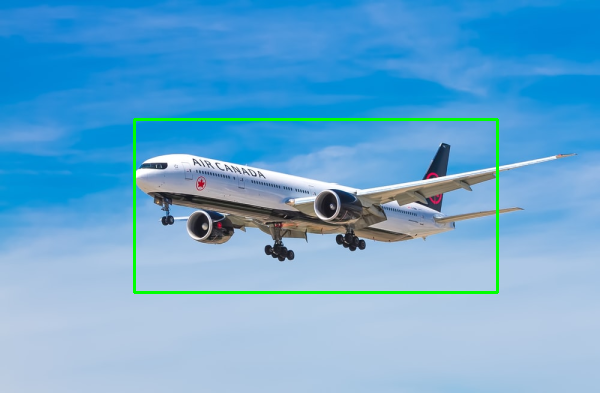

In [ ]:
model = load_model(MODEL_PATH)

# Loop over the image that are going to be used for testing the bounding box regression model
for imagePath in file_list:
  
  # Load the input image (in Keras format) from disk and preprocess it, scaling pixel intensities to the range [0,1]
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image) / 255.0
  print(image.shape)
  image = np.expand_dims(image, axis=0)
  print(image.shape)
  # Make the bounding box predictions on the input image
  preds = model.predict(image)[0]
  print(model.predict(image))
  (startX, startY, endX, endY) = preds
  
  # Load the input image (in OpenCV format), resize it such that it fits in the screen and grab its dimensions
  image = cv2.imread(imagePath)
  print(image.shape)
  
  # Resize all images to same shape keeping aspect ratio so all images take equal space
  image = imutils.resize(image, width=600)
  print(image.shape)
  
  (h, w) = image.shape[:2]
  # Scale the predicted bounding box coordinates based on the image dimensions
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)

  # Draw the predicted image bounding box on the image
  cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
  # Show the output image
  cv2_imshow(image)
  #cv2.waitKey(0)
